# HW1 Data Cleaning & EDA

## Logistics & Scoring Breakdown

This is an **individual project**.

Your should submit your **Jupyter Notebook** on bcourse.

Your notebook should contains all the written answers, graphs, and corresponding code.

|Question|Points|
|---|---|
|1a|2|
|1b|1|
|1c|1|
|2a|2|
|2b|2|
|2c|3|
|2d|2|
|3a|3|
|3b|4|
|4a|4|
|4b|4|
|**Total**|28|

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Part 1 Import the Data

**1.a** 

The dataset `hotels-europe_features` contains hotels in many European cities. Start by loading the dataset into a pandas DataFrame. Then, find out how many unique cities are represented in the data. Also, identify the top 5 cities with the most hotels.

Note: use `city` column instead of `city_actual`.

The dataset contains the following variables:

| Variable       | Description                           | Type     |
| -------------- | ------------------------------------- | -------- |
| hotel_id       | Hotel ID                              | numeric  |
| accommodation_type | Type of accomodation              | factor   |
| country        | Country                               | string   |
| city           | City based on search                  | string   |
| city_actual    | City actual of hotel                  | string   |
| neighbourhood  | Neighbourhood                         | string   |
| center1label   | Centre 1 - name of location for distance | string |
| distance       | Distance - from main city center      | numeric  |
| center2label   | Centre 2 - name of location for distance_alter | string |
| distance_alter | Distance - alternative - from Centre 2 | numeric |
| stars          | Number of stars                       | numeric  |
| rating         | User rating average                   | numeric  |
| rating_count   | Number of user ratings                | numeric  |
| ratingta       | User rating average (tripadvisor)     | numeric  |
| ratingta_count | Number of user ratings (tripadvisor)  | numeric  |


In [2]:
df = pd.read_csv('hotels-europe_features.csv')
num_unique_cities = df['city'].nunique()
print("Number of unique cities:", num_unique_cities)
top_cities = df['city'].value_counts().head(5)
print("Top 5 cities with the most hotels:\n", top_cities)

Number of unique cities: 46
Top 5 cities with the most hotels:
 Rome        4883
Paris       2184
London      1401
Istanbul    1377
Milan       1098
Name: city, dtype: int64


**1.b** 

The city of Rome has the most hotels in the dataset. Please create a new DataFrame that only includes data from hotels in Rome.

Note: you will use df_rome in the rest of the homework.

In [3]:
df_rome = df_rome = df[df['city'] == 'Rome']

**1.c** 

Provide basic statistics ('count', 'mean', 'std', 'min', 'median', 'max') for the `rating` and `distance` columns for hotels in Rome.

In [4]:
rating_distance_stats = df_rome[['rating', 'distance']].describe()
rating_median = df_rome['rating'].median()
distance_median = df_rome['distance'].median()
rating_distance_stats.loc['median'] = [rating_median, distance_median]
print(rating_distance_stats)

             rating     distance
count   4354.000000  4883.000000
mean       3.974828     1.788777
std        0.609154     2.363127
min        1.000000     0.000000
25%        3.700000     0.700000
50%        4.000000     1.200000
75%        4.400000     1.800000
max        5.000000    16.000000
median     4.000000     1.200000


## Part 2 Missing Data Handling

**2.a** 

There are many missing values in the data. To deal with these missing values, we can drop all rows with missing values in a copy of Rome's DataFrame. Implement this stategy to all the features. After that, report the same statistics as in 1.c for the `rating` and `distance`.

In [5]:
df_rome_drop = df_rome.copy().dropna()
rating_distance_stats_drop = df_rome_drop[['rating', 'distance']].describe()
rating_median_drop = df_rome_drop['rating'].median()
distance_median_drop = df_rome_drop['distance'].median()
rating_distance_stats_drop.loc['median'] = [rating_median_drop, distance_median_drop]
print(rating_distance_stats_drop)

             rating     distance
count   1523.000000  1523.000000
mean       3.826461     2.193171
std        0.515275     3.085745
min        1.000000     0.100000
25%        3.500000     0.800000
50%        3.900000     1.100000
75%        4.100000     1.900000
max        5.000000    16.000000
median     3.900000     1.100000


**2.b**
Another common way to handle these missing values is by imputing them with the mean of the numerical variables. Implement this stategy to all numerical variables. After that, report the same statistics as in 1.c for the `rating` and `distance`.

In [6]:
df_rome_imputed = df_rome.copy()
df_rome_imputed = df_rome_imputed.fillna(df_rome_imputed.mean())
rating_distance_stats_imputed = df_rome_imputed[['rating', 'distance']].describe()
rating_median_imputed = df_rome_imputed['rating'].median()
distance_median_imputed = df_rome_imputed['distance'].median()
rating_distance_stats_imputed.loc['median'] = [rating_median_imputed, distance_median_imputed]
print(rating_distance_stats_imputed)

             rating     distance
count   4883.000000  4883.000000
mean       3.974828     1.788777
std        0.575205     2.363127
min        1.000000     0.000000
25%        3.700000     0.700000
50%        4.000000     1.200000
75%        4.400000     1.800000
max        5.000000    16.000000
median     4.000000     1.200000


**2.c**

For this task, you are to create correlation heatmaps for the Rome's DataFrame after applying both methods of handling missing values: dropping rows and imputing with the mean. Comment on any differences in the correlation matrix between the two methods.

Specifically, only focus on the correlation between the numerical variables.


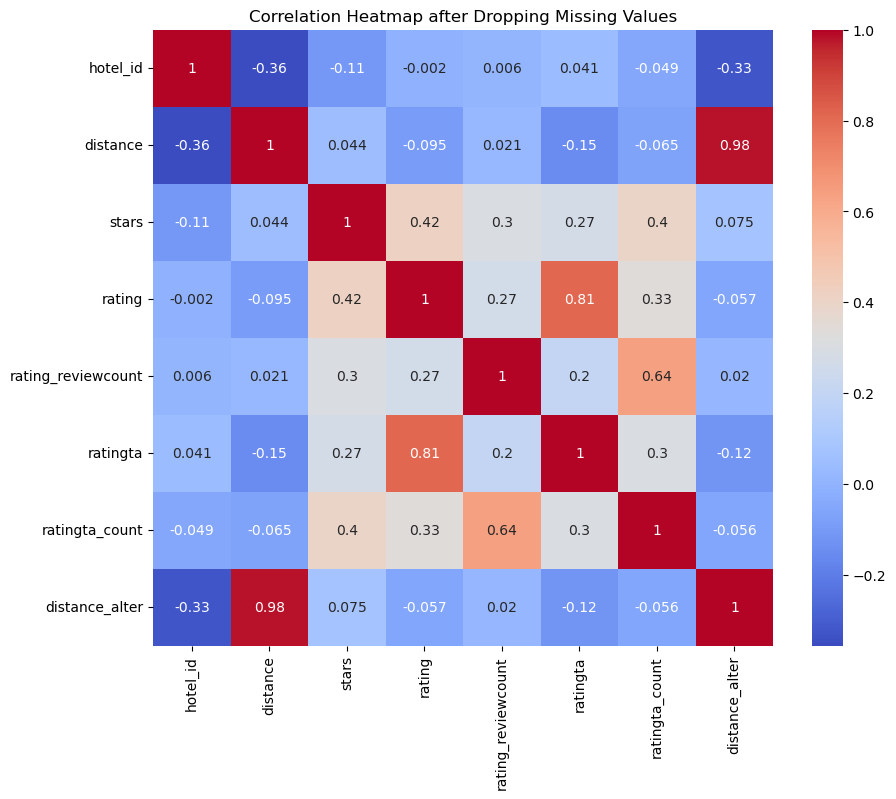

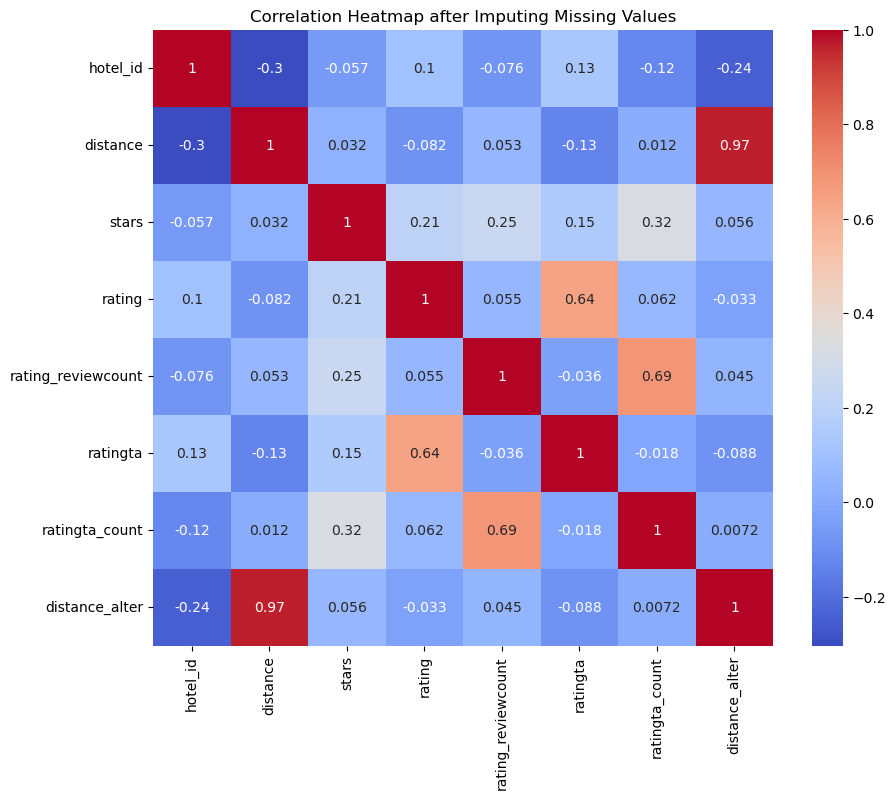

In [7]:
corr_matrix_drop = df_rome_drop.corr()
corr_matrix_impute = df_rome_imputed.corr()

# Plot heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_drop, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after Dropping Missing Values')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_impute, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after Imputing Missing Values')
plt.show()

Imputing missing values with the mean has the effect of reducing the variability in the data, since the mean is not a measure of spread. Thus, the correlations are lower in the imputed heatmap.

**2.d**
You have now dealt with missing values in the Rome's DataFrame using two different methods: dropping rows with missing values (Complete-case analysis, CCA) and imputing missing values with the mean. Discuss the advantages and disadvantages of each method.

Dropping rows with missing values (CCA) is a simple decision that invokes no estimation bias, since it does not involve estimation. It may lose important data, incur bias from the dropped portions of the sample being non-random, and reduce the statistical power of the model it is applied to.
Imputing missing values with the mean has the advantages of preserving all the observed data and simply taking care of missing data. However, it reduces the model's variability, which may cause it to underestimate analytical errors, it does not account for the uncertainty of the imputation of values, and could lead to imputation bias.

## Part 3 Outlier Handling

**3.a**

For this task, you will need to create histograms and boxplot for the `rating` column. Generate these histograms using the Rome's DataFrame after dropping rows with missing values. 

Comment on your findings based on the histograms (for example, mode and skewness).

Note: Make sure to use an appropriate number of bins for your histograms, and clearly label your axes and titles for each plot.

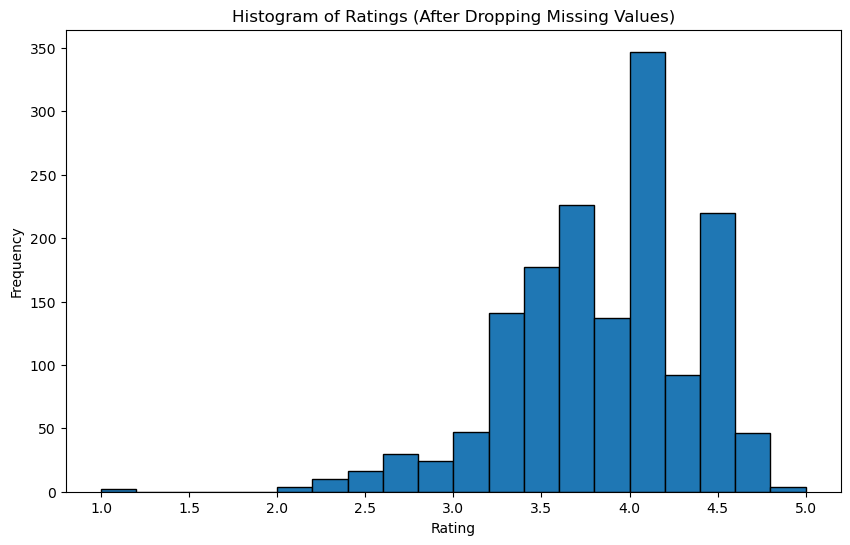

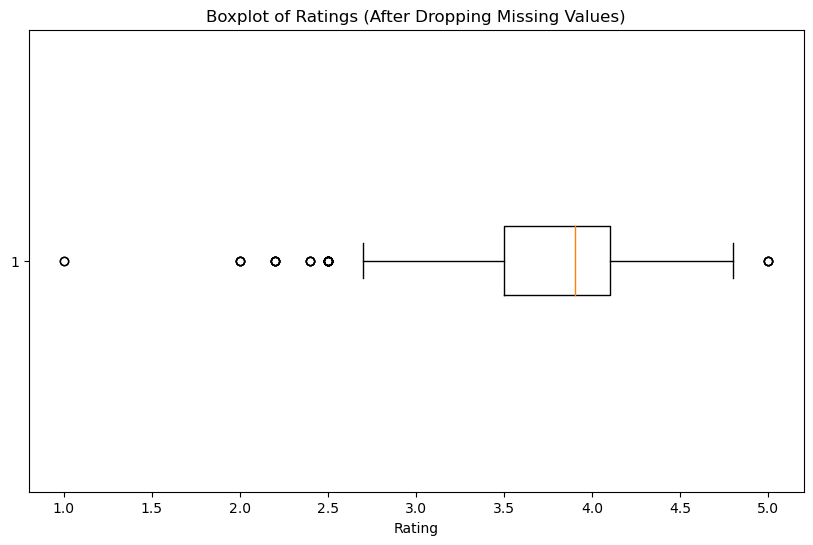

In [8]:
# Plot histogram and boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_rome_drop['rating'], bins=20, edgecolor='black')
plt.title('Histogram of Ratings (After Dropping Missing Values)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot(df_rome_drop['rating'], vert=False)
plt.title('Boxplot of Ratings (After Dropping Missing Values)')
plt.xlabel('Rating')
plt.show()

The histogram indicates that the data set has a mode around 4 stars and is skewed to the left.

**3.b** 

One way to address this issue is by applying scaling. In this task, implement scaling using techniques such as minmax, winsorization, or normalization.

Then create new histograms and boxplot for `rating` column. Compared with original distribution in 3a, comment on the results based on the statistics and the plots. Provide a brief explanation of your findings.

Note: use the Rome DataFrame after dropping rows with missing values. Feel free to use any libraries, such as sklearn.

In [9]:
# Apply scaling to reduce outliers
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
scaler = MinMaxScaler()
df_rome_drop['rating_scaled'] = scaler.fit_transform(df_rome_drop[['rating']])
df_rome_drop['rating_winsorized'] = winsorize(df_rome_drop['rating'], limits=[0.05, 0.05])

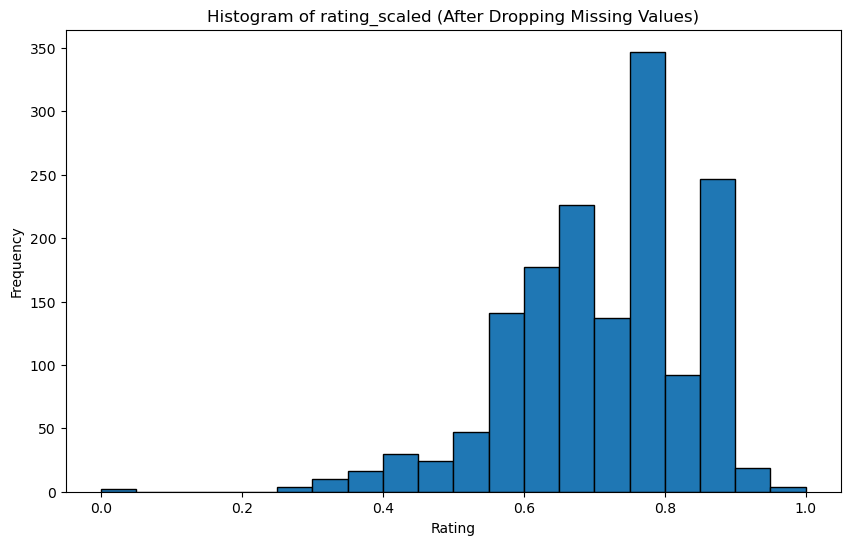

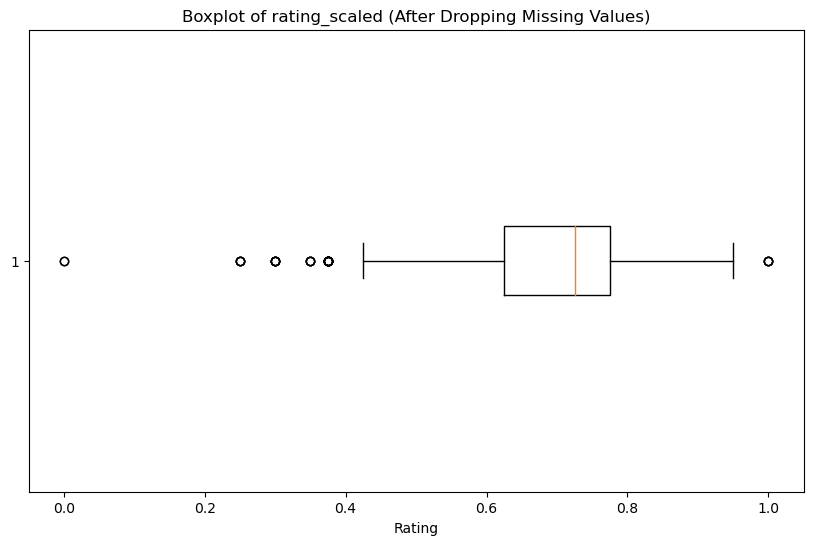

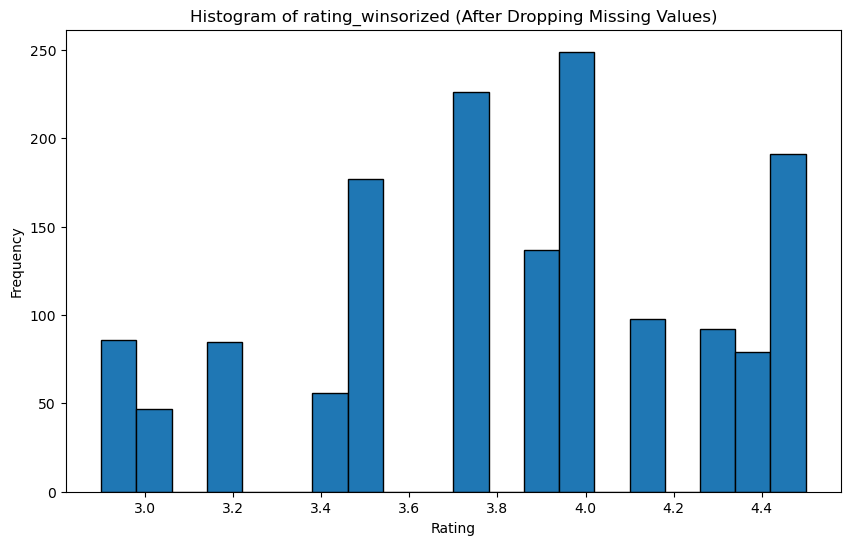

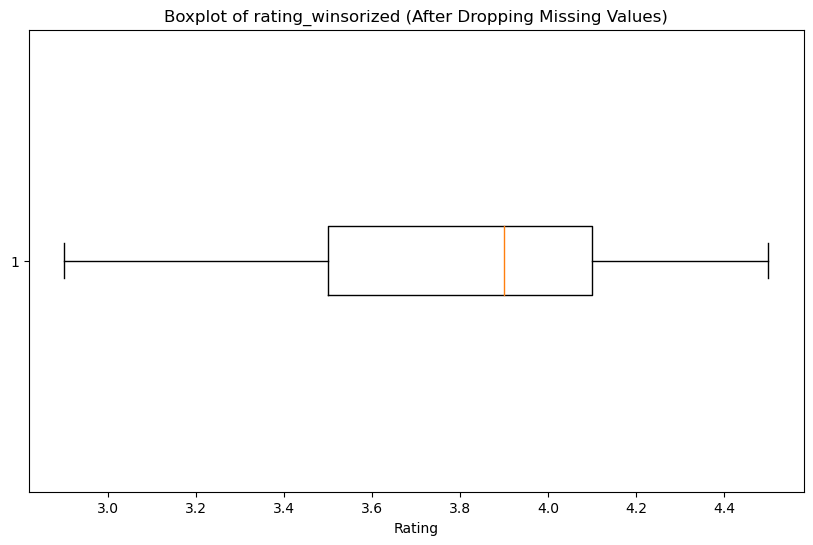

In [10]:
# Plot histogram and boxplot
for column in ['rating_scaled', 'rating_winsorized']:
    plt.figure(figsize=(10, 6))
    plt.hist(df_rome_drop[column], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column} (After Dropping Missing Values)')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.boxplot(df_rome_drop[column], vert=False)
    plt.title(f'Boxplot of {column} (After Dropping Missing Values)')
    plt.xlabel('Rating')
    plt.show()

The scaled ratings have the same shape as the original distribution with a different range, to reflect the scaled values in the data set. The winsorized ratings have the same range as the original distribution with a different shape. Both minimize the effect of outliers on the data, with scaling dampening their numerical weight and with winsorization replacing extreme values with the minimum and maximum values in the 5th and 95th percentiles of the observed data set.

## Part 4 The Closer, the Better?

**4.a**
In the Rome's DataFrame, there are two columns of interest: `rating` and `distance`. We want to investigate the relationship between these variables to better understand the factors that contributes to hotel ratings. 

Plot the relationship with at least a scatter plot and a trend line. Describe your result and give one possible reason for this linear relationship.

Note: use the Rome DataFrame after dropping rows with missing values.

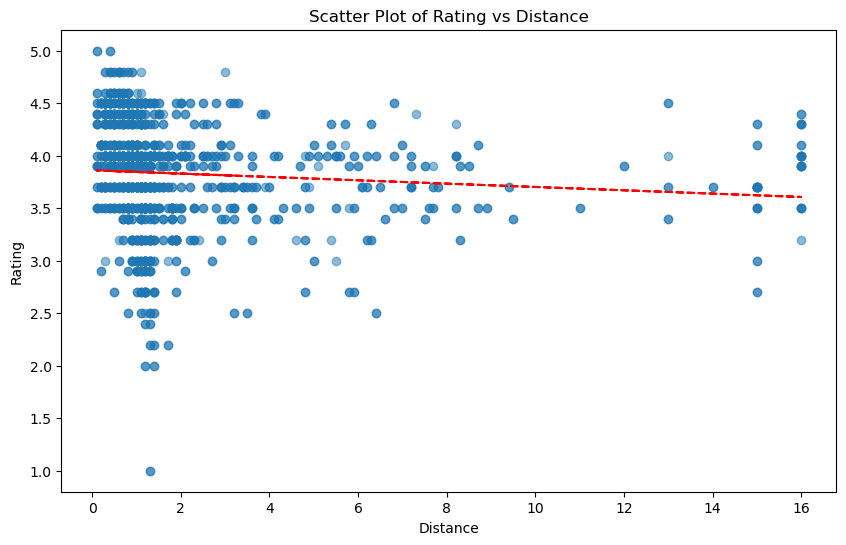

In [11]:
# Plot Rating vs Distance
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(df_rome_drop['distance'], df_rome_drop['rating'], alpha=0.5)
plt.title('Scatter Plot of Rating vs Distance')
plt.xlabel('Distance')
plt.ylabel('Rating')
z = np.polyfit(df_rome_drop['distance'], df_rome_drop['rating'], 1)
p = np.poly1d(z)
plt.plot(df_rome_drop['distance'], p(df_rome_drop['distance']), "r--")
plt.show()

There appears to be a very slightly negative relationship between distance and rating, with hotels further away from Rome averaging a fraction of a rating point less than those close to Rome. This marginal decrease could be explained by there being an emphasis on accommodating tourists in the city, with a more bare-bones, efficient approach to service when this demand is not present. However, the decrease is slight enough to indicate that it might not be representative of a causal relationship between distance and rating. More data should be collected and cleaned to remove potential biases, and then processes like PCA should be conducted to further isolate these two variables and draw some connection between them - or not.

**4.b** 

In this problem, we want to investigate the relationship between hotel ratings and distance in different neighborhoods of Rome. Create scatter plot with a trend line for each neighborhood. 

Identify one neighborhood that do not follow the expected trend between hotel ratings and distance in Problem 4a, and provide one possible reason.

Note: use the Rome DataFrame after dropping rows with missing values.

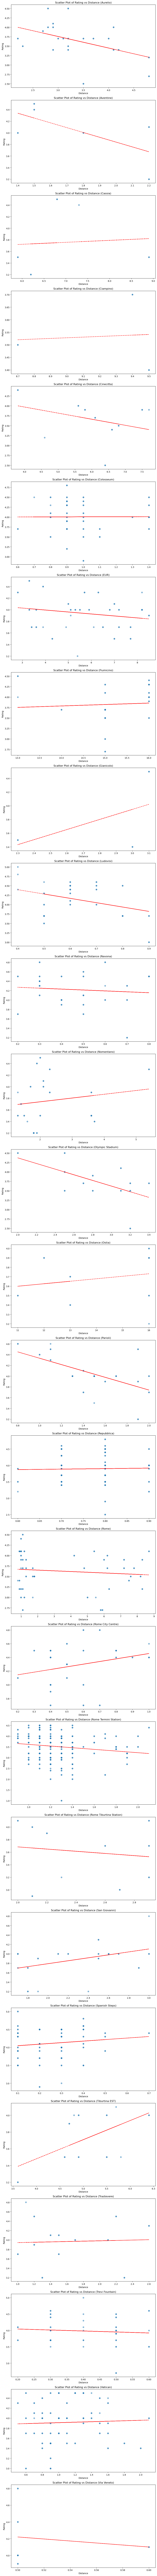

In [12]:
# Create subplots for each neighborhood
neighborhoods = df_rome_drop['neighbourhood'].unique()
fig, axs = plt.subplots(len(neighborhoods), figsize=(10, 6*len(neighborhoods)))

# Iterate over each neighborhood and plot the relationship between 'rating' and 'distance'
for i, neighborhood in enumerate(neighborhoods):
    df_neighborhood = df_rome_drop[df_rome_drop['neighbourhood'] == neighborhood]
    axs[i].scatter(df_neighborhood['distance'], df_neighborhood['rating'], alpha=0.5)
    axs[i].set_title(f'Scatter Plot of Rating vs Distance ({neighborhood})')
    axs[i].set_xlabel('Distance')
    axs[i].set_ylabel('Rating')
    z = np.polyfit(df_neighborhood['distance'], df_neighborhood['rating'], 1)
    p = np.poly1d(z)
    axs[i].plot(df_neighborhood['distance'], p(df_neighborhood['distance']), "r--")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Tiburtina EST is one neighborhood that defies the observed negative relationship between distance and rating observed in the last part. One reason for it strong positive relationship between the two variables (with substantial data points to observe a relationship, mind you), is that there are high levels of noise in parts of the neighborhood closer to the city that is not present further, which could disadvantage hotels constructed close to Rome.

# Congratulations! You have finished HW 1.


## Submission Checklist

- You should submit your **Jupyter Notebook** on bcourse.

- Your notebook should contain all the written answers, graphs, and corresponding code.

- Make sure you have run all cells in your notebook, so that all images/graphs appear in the output.

- Be sure that your notebook is named exactly as specified (including spelling and case): LASTNAME_FIRSTNAME_HW1.ipynb
